## Data Scraping with R rvest
### Daily average tempurature of Buffalo, NY
### [Weather Underground, Buffalo, NY 2016](https://www.wunderground.com/history/airport/KBUF/2016/01/01/DailyHistory.html?req_city=Buffalo&req_state=NY&reqdb.zip=14201&reqdb.magic=1&reqdb.wmo=99999&MR=1)

This is an R Markdown document. Markdown is a simple formatting syntax for authoring HTML, PDF, and MS Word documents. For more details on using R Markdown see <http://rmarkdown.rstudio.com>.

When you click the **Knit** button a document will be generated that includes both content as well as the output of any embedded R code chunks within the document. 

Here will be develop an R program to scrape data from the Weather Underground website for Buffalo, NY in 2016.  Note that 2016 was a leap year, so there will be 266 data values to scrape from 266 webpages.

# Scrapping one value

First we try to read one data value into R.  We will scrape the Mean Temperature on Friday, January 1, 2016.  The value was 29.

The webpage we will start with is [Weather Underground, Buffalo, NY January 1, 2016 2016](https://www.wunderground.com/history/airport/KBUF/2016/01/01/DailyHistory.html?req_city=Buffalo&req_state=NY&reqdb.zip=14201&reqdb.magic=1&reqdb.wmo=99999&MR=1).  Note that the date is in the web address. 

We will be using the [rvest](https://github.com/hadley/rvest) R package.  It is useful to read over the examples on Hadley's github page.  It is also useful to watch the RStudio videos about extracting data from the web.

- [Estracting data from the web Part1 httr](https://www.rstudio.com/resources/webinars/extracting-data-from-the-web-part-1/https://www.rstudio.com/resources/webinars/extracting-data-from-the-web-part-1/)
- [Extracting data from the web Part2 rvest](https://www.rstudio.com/resources/webinars/extracting-data-from-the-web-part-2/)

To get started we need to examine the html for the webpage we are trying to read from to try to find the nearby code to give to rvest to find the value we need.  To say the webapge, open it in Firefox (or other browswer), the right-click on the page, and then click Save Page As.  Browse to where you save the file and then open it in a text editor.  Try to do a search for the value we aer looking for, here 29.  You may need to click next a few times to find it.  The value should have Mean Tempurature just about it.  When you find it you will see something like.

     </div>
		    <table id="historyTable" class="responsive airport-history-summary-table" cellspacing="0" cellpadding="0">
		    <thead>
		    <tr>
		    <th>&nbsp;</th>
		    <th>Actual</th>
		    <th>Average </th>
		    <th>Record </th>
		    </tr>
		    </thead>
		    <tbody>
		    <tr>
		    <td class="history-table-grey-header">Temperature</td>
		    <td colspan="3" class="history-table-grey-header">&nbsp;</td>
		    </tr>
		    <tr>
		    <td class="indent"><span>Mean Temperature</span></td>
		    <td>
      <span class="wx-data"><span class="wx-value">29</span><span class="wx-unit">&nbsp;°F</span></span>
     </td>
        <td>
          
The start of this block of code has **div** and tghe calue is in a **span** line.  So after trying a few other things, these two words find what we are looking for when using rvest.

Here is some code modified from the [rvest](https://github.com/hadley/rvest) website.  It reads all of the value from the webpage with **div** and **span**.  It is the $13^{th}$ value that we need.

In [14]:
library(rvest)

buffalo <- read_html("https://www.wunderground.com/history/airport/KBUF/2016/01/01/DailyHistory.html")
  mean.temp <- buffalo %>% 
    html_nodes("div span") %>%
    html_text() %>%
    as.numeric()
  mean.temp

Warning message in function_list[[k]](value):
“NAs introduced by coercion”

[1]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
 [13] 29.00    NA    NA 26.00    NA    NA    NA 32.00    NA    NA 32.00    NA
 [25]    NA 63.00    NA    NA    NA 26.00    NA    NA 20.00    NA    NA  0.00
 [37]    NA    NA    NA    NA    NA    NA    NA    NA    NA 20.00    NA    NA
 [49]    NA    NA    NA    NA  0.03    NA    NA  0.12    NA    NA  1.40    NA
 [61]    NA    NA    NA    NA  1.90    NA    NA  0.90    NA    NA  8.10    NA
 [73]    NA    NA    NA    NA    NA    NA    NA    NA 30.03    NA    NA    NA
 [85] 15.00    NA    NA    NA 26.00    NA    NA    NA 33.00    NA    NA    NA
 [97]  7.00    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[109]    NA    NA 30.90    NA    NA 20.70    NA    NA 23.00    NA    NA 30.09
[121]    NA    NA  9.00    NA    NA 13.80    NA    NA  0.00    NA    NA 32.00
[133]    NA    NA 23.00    NA    NA 21.90    NA    NA 30.07    NA    NA  9.00
[145]    NA    NA 11.50    NA    NA 19.60    NA    NA  0.00    NA    NA 32.00
[157]    NA    NA 21.20    NA    NA 23.00    NA    NA 30.06    NA    NA 10.00
[169]    NA    NA 16.10    NA    NA  0.00    NA    NA 32.00    NA    NA 21.60
[181]    NA    NA 24.10    NA    NA 30.05    NA    NA 10.00    NA    NA 15.00
[193]    NA    NA  0.00    NA    NA 30.90    NA    NA 21.20    NA    NA 24.10
[205]    NA    NA 30.04    NA    NA 10.00    NA    NA 12.70    NA    NA  0.00
[217]    NA    NA 30.90    NA    NA 19.80    NA    NA 23.00    NA    NA 30.02
[229]    NA    NA 10.00    NA    NA 16.10    NA    NA 30.90    NA    NA 21.20
[241]    NA    NA 21.90    NA    NA 30.02    NA    NA  8.00    NA    NA 12.70
[253]    NA    NA  0.00    NA    NA 30.00    NA    NA 20.00    NA    NA 23.00
[265]    NA    NA 30.02    NA    NA  7.00    NA    NA 12.70    NA    NA  0.00
[277]    NA    NA 28.90    NA    NA 19.20    NA    NA 21.90    NA    NA 29.99
[289]    NA    NA  7.00    NA    NA 11.50    NA    NA 21.90    NA    NA  0.00
[301]    NA    NA 28.90    NA    NA 17.30    NA    NA 21.90    NA    NA 29.99
[313]    NA    NA  2.00    NA    NA 16.10    NA    NA 20.70    NA    NA  0.00
[325]    NA    NA 28.90    NA    NA 16.90    NA    NA 21.90    NA    NA 29.99
[337]    NA    NA  1.00    NA    NA 17.30    NA    NA 23.00    NA    NA  0.00
[349]    NA    NA 28.90    NA    NA 19.20    NA    NA 21.90    NA    NA 30.02
[361]    NA    NA  3.00    NA    NA 11.50    NA    NA  0.00    NA    NA 28.90
[373]    NA    NA 17.30    NA    NA 21.00    NA    NA 29.99    NA    NA  9.00
[385]    NA    NA 16.10    NA    NA 24.20    NA    NA  0.00    NA    NA 28.90
[397]    NA    NA 19.20    NA    NA 21.00    NA    NA 29.99    NA    NA  2.50
[409]    NA    NA 11.50    NA    NA  0.00    NA    NA 28.00    NA    NA 18.10
[421]    NA    NA 23.00    NA    NA 29.99    NA    NA  0.50    NA    NA 11.50
[433]    NA    NA  0.00    NA    NA 28.00    NA    NA 17.50    NA    NA 24.10
[445]    NA    NA 30.03    NA    NA  0.20    NA    NA 12.70    NA    NA  0.00
[457]    NA    NA 28.00    NA    NA 18.60    NA    NA 25.00    NA    NA 30.00
[469]    NA    NA  0.20    NA    NA 10.40    NA    NA  0.02    NA    NA 28.00
[481]    NA    NA 18.10    NA    NA 25.00    NA    NA 30.00    NA    NA  0.80
[493]    NA    NA 11.50    NA    NA  0.02    NA    NA 28.00    NA    NA 18.10
[505]    NA    NA 25.00    NA    NA 29.99    NA    NA  2.00    NA    NA 11.50
[517]    NA    NA  0.03    NA    NA 28.90    NA    NA 19.20    NA    NA 24.10
[529]    NA    NA 30.02    NA    NA  5.00    NA    NA 11.50    NA    NA  0.03
[541]    NA    NA 30.00    NA    NA 20.50    NA    NA 21.90    NA    NA 29.99
[553]    NA    NA  9.00    NA    NA 11.50    NA    NA 24.20    NA    NA  0.00
[565]    NA    NA 30.00    NA    NA 17.90    NA    NA 19.00    NA    NA 30.01
[577]    NA    NA  5.00    NA    NA 18.40    NA    NA 32.20    NA    NA  0.00
[589]    NA    NA 30.00    NA    NA 16.90    NA    NA 17.10    NA    NA 29.99
[601]    NA    NA 10.00    NA    NA 21.90    NA    NA 27.60    NA    NA  0.00
[613]    NA    NA 30.00 

In [15]:
mean.temp[13]

[1] 29

## Scrapping three values

In [16]:
buffalo.data <- numeric(3)

buffalo <- read_html("https://www.wunderground.com/history/airport/KBUF/2016/01/01/DailyHistory.html")
mean.temp <- buffalo %>% 
  html_nodes("div span") %>%
  html_text() %>%
  as.numeric()
#mean.temp
mean.temp[13]
buffalo.data[1] <- mean.temp[13]

buffalo <- read_html("https://www.wunderground.com/history/airport/KBUF/2016/01/02/DailyHistory.html")
mean.temp <- buffalo %>% 
  html_nodes("div span") %>%
  html_text() %>%
  as.numeric()
#mean.temp
mean.temp[13]
buffalo.data[2] <- mean.temp[13]

buffalo <- read_html("https://www.wunderground.com/history/airport/KBUF/2016/01/03/DailyHistory.html")
mean.temp <- buffalo %>% 
  html_nodes("div span") %>%
  html_text() %>%
  as.numeric()
#mean.temp
mean.temp[13]
buffalo.data[3] <- mean.temp[13]

buffalo.data

Warning message in function_list[[k]](value):
“NAs introduced by coercion”

[1] 29

Warning message in function_list[[k]](value):
“NAs introduced by coercion”

[1] 30

Warning message in function_list[[k]](value):
“NAs introduced by coercion”

[1] 28

[1] 29 30 28

## Scrapping the full year of values

2016 was a leap year.  So February had 29 days.  Also, April, June, September, and November have 30 days.  So we need to do a bit of checking to make sure we only collect data for the days of the year.

In [17]:
buffalo.data <- numeric()

M <- 12
B <- 31

for (m in 1:M){
  for (d in 1:B){ 
    if (m == 2 & d > 29) break
    if ( ( m %in% c(4,6,9,11) ) &  d > 30 ) break

    buffalo <- read_html(paste0("https://www.wunderground.com/history/airport/KBUF/2016/",m,"/",d,"/DailyHistory.html"))
    mean.temp <- buffalo %>% 
      html_nodes("div span") %>%
      html_text() %>%
      as.numeric()
    #mean.temp
    #mean.temp[13]
    buffalo.data <- c(buffalo.data,mean.temp[13])
  }
}

buffalo.data

Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](value):
“NAs introduced by coercion”Warning message in function_list[[k]](

[1] 29 30 28 15 16 27 31 33 45 36 18 22 18 21 37 36 21 15 16 22 21 17 17 21 36
 [26] 40 33 33 27 34 47 46 37 50 36 31 31 38 42 34 23 11 18  6  0 15 29 23 17 31
 [51] 45 36 29 28 34 32 22 32 51 40 25 26 23 25 26 30 43 54 58 49 38 40 42 50 45
 [76] 50 46 35 31 31 31 40 43 40 42 40 50 47 38 46 59 50 35 26 25 25 37 42 32 29
[101] 30 45 38 38 42 51 57 58 57 52 53 59 57 47 48 48 38 43 43 45 52 50 45 50 53
[126] 54 56 60 49 50 53 61 67 61 51 43 48 56 53 54 59 61 63 64 64 67 73 74 78 78
[151] 71 71 67 70 71 70 69 67 62 54 56 59 69 65 57 60 70 73 72 74 72 75 68 68 68
[176] 67 73 78 77 70 67 68 67 65 68 72 76 78 78 77 72 72 73 79 81 78 74 70 71 78
[201] 70 69 74 80 81 78 76 74 75 77 76 75 74 74 74 74 78 80 78 73 73 79 81 83 82
[226] 84 77 75 78 74 75 78 80 73 67 69 73 77 75 75 77 74 71 72 66 65 63 68 71 74
[251] 78 80 77 77 65 64 68 64 60 65 72 72 71 69 69 70 66 56 55 61 62 65 60 61 61
[276] 62 63 63 64 65 65 57 51 49 51 61 55 50 56 69 69 69 60 54 49 44 49 47 43 39
[301] 42 41 55 48 41 54 61 51 45 52 48 50 49 44 44 45 41 50 47 46 43 45 57 49 33
[326] 31 33 31 40 43 40 40 43 52 52 41 40 38 39 37 36 38 33 28 28 26 34 30 21 13
[351] 16 27 25 17 27 33 34 35 38 32 42 39 30 34 30 34

Next we will create the dates for each day of 2016.  R has a function *seq()* that works with dates.  The *as.Date()* tells R that values are dates.

In [18]:
buffalo.date1 <- data.frame(seq(as.Date("2016/1/1"), as.Date("2016/12/31"), "days"))

Finally, we will put the dates and mean tempuratures together into a dataframe.  We will use another of Hadley's packages **plyr**.

In [19]:
library(dplyr)

buffalo.data1 <- as.data.frame(buffalo.data)

buffalo.final <- bind_cols(buffalo.date1, buffalo.data1)

colnames(buffalo.final) <- c("date","temp")

buffalo.final

summary(buffalo.final$temp)

date,temp
2016-01-01,29
2016-01-02,30
2016-01-03,28
2016-01-04,15
2016-01-05,16
2016-01-06,27
2016-01-07,31
2016-01-08,33
2016-01-09,45
2016-01-10,36


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   37.00   51.00   51.44   69.00   84.00 


## Visualize the data

We start by making a scatterplot using base R.

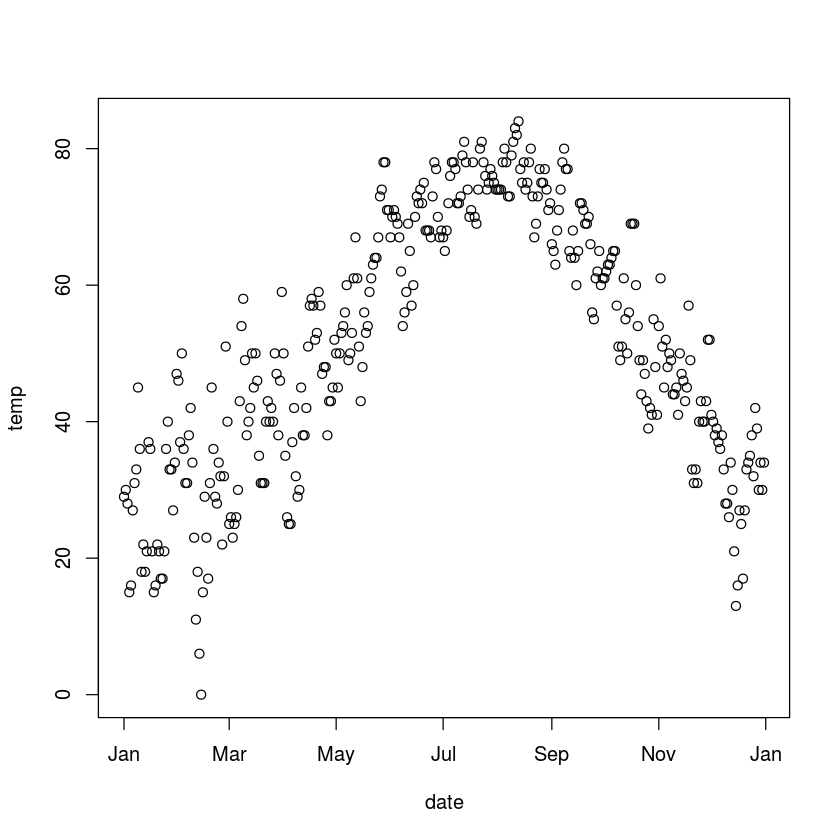

In [20]:
plot(buffalo.final)

Next, using the *qplot()* function from the **ggplot2** package.

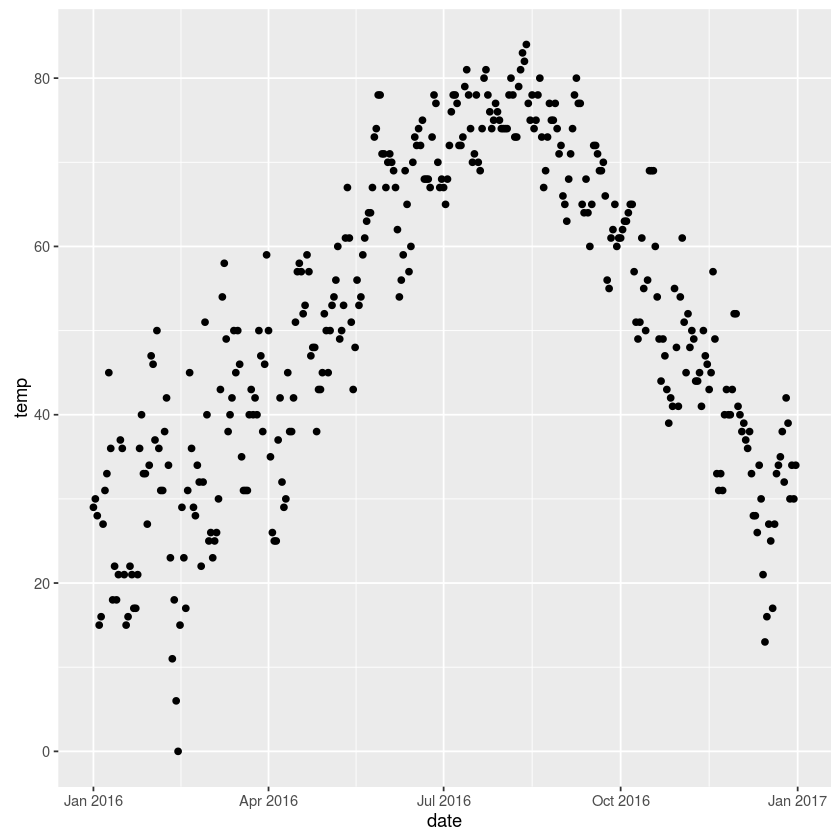

In [21]:
library(ggplot2)

qplot(date, temp, data=buffalo.final)

And finally, using the *ggplot()* function.

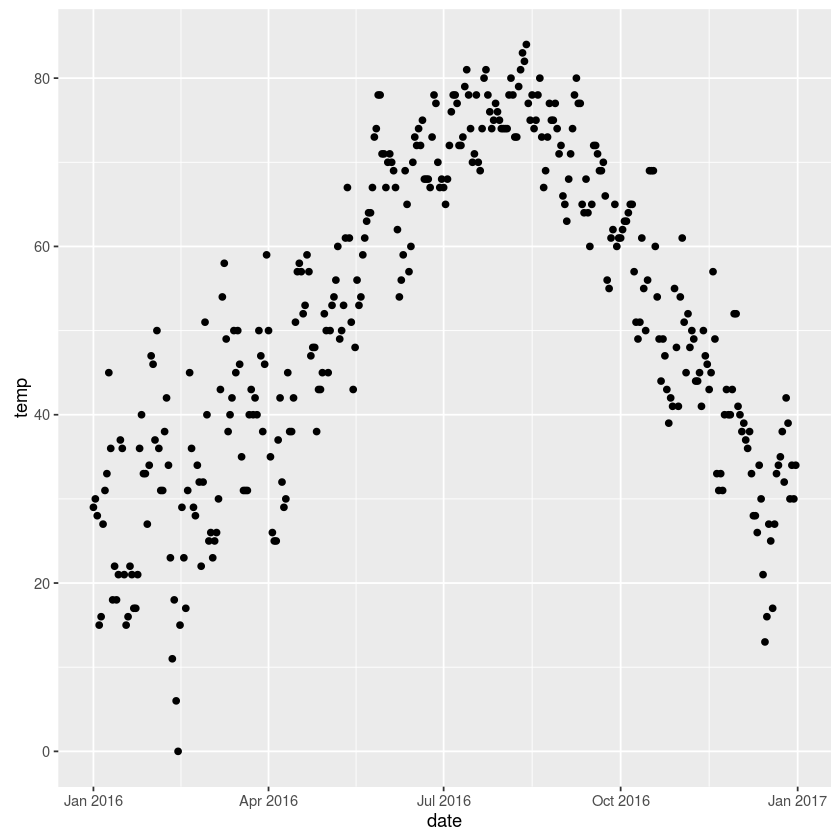

In [22]:
p <- ggplot(buffalo.final, aes(date,temp))
p + geom_point()

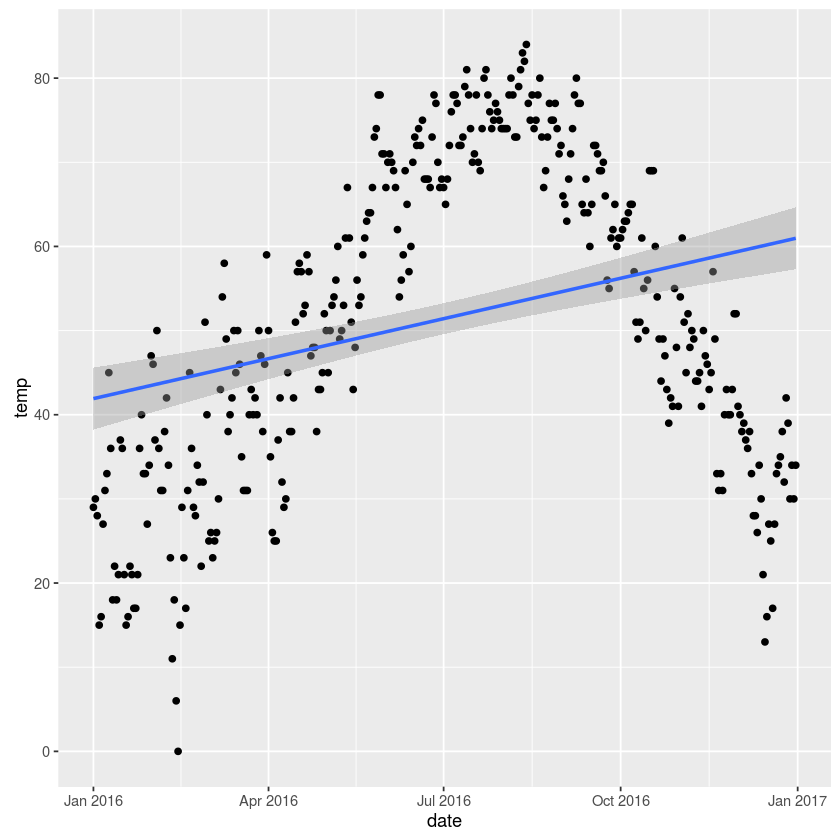

In [23]:
p + geom_point() + stat_smooth(method=lm, level=0.95)

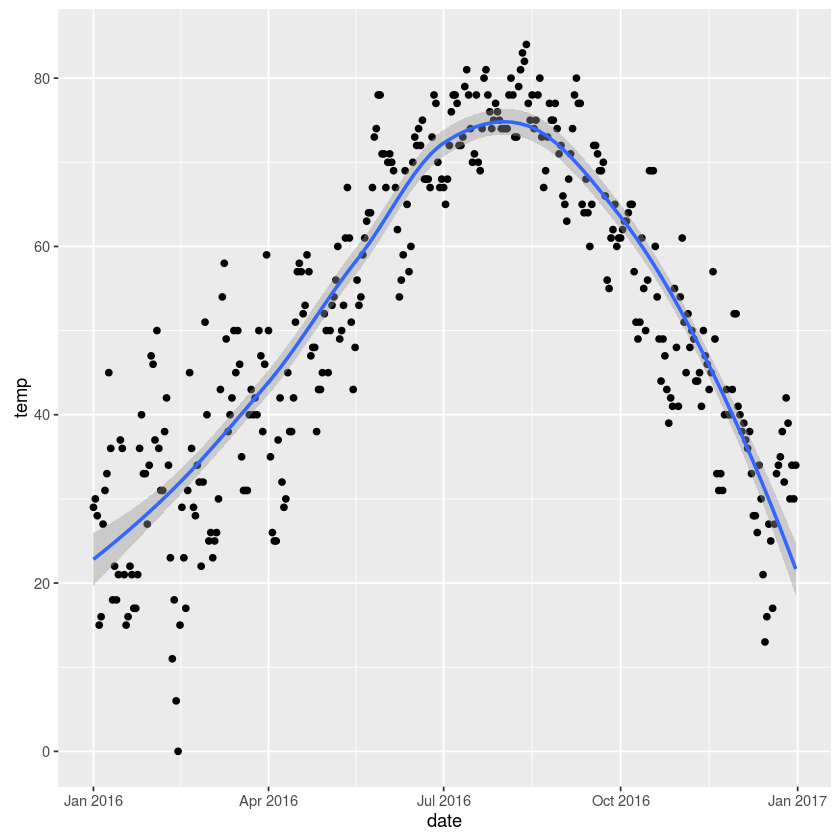

In [24]:
p + geom_point() + stat_smooth()

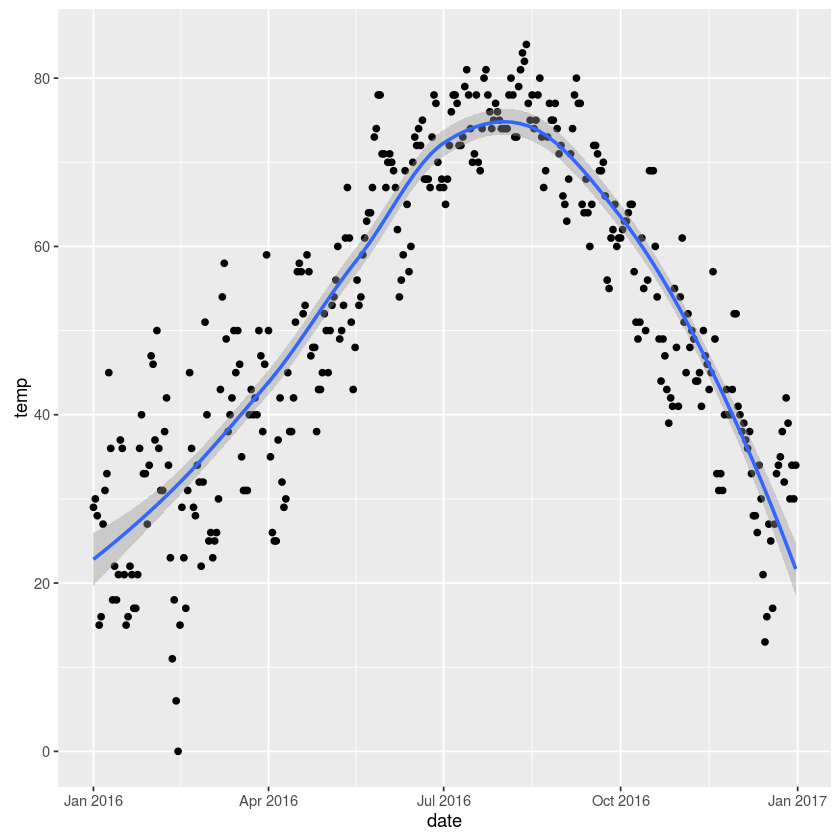

In [25]:
p + geom_point() + stat_smooth(method=loess)

**Question:** What do you see in your plot?  Is it warmer in the Summer months and colder in the Winter months?